In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [43]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date)
recent_date = recent_date.order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

([<matplotlib.axis.XTick at 0x7fa0138b41f0>,
 [Text(0, 0, '2016-08-23'),
  Text(90, 0, '2016-11-23'),
  Text(180, 0, '2017-02-23'),
  Text(270, 0, '2017-05-23'),
  Text(360, 0, '2017-08-18')])

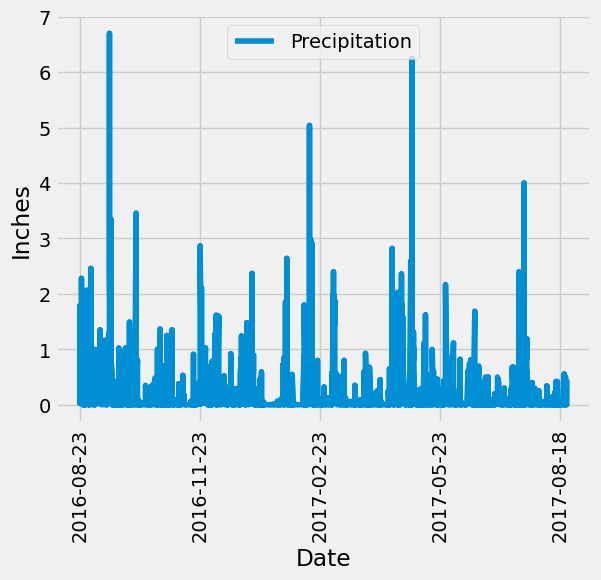

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_range = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
p_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_range)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(p_data)
df = df.rename(columns =  {'date' : 'Date',
                      'prcp' : 'Precipitation'})
# # Sort the dataframe by date
df = df.set_index('Date').sort_index(ascending=True).dropna()
df
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df.index,df.Precipitation)
plt.legend(['Precipitation'], loc = 'upper center')
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Inches')
# Set ticks at equidistant times
plt.xticks([0,90,180,270,360],labels=['2016-08-23','2016-11-23','2017-02-23','2017-05-23','2017-08-18'],rotation = 90)

In [79]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [108]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [124]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

Station USC00519281 has the greatest number of observations

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
active_stations

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

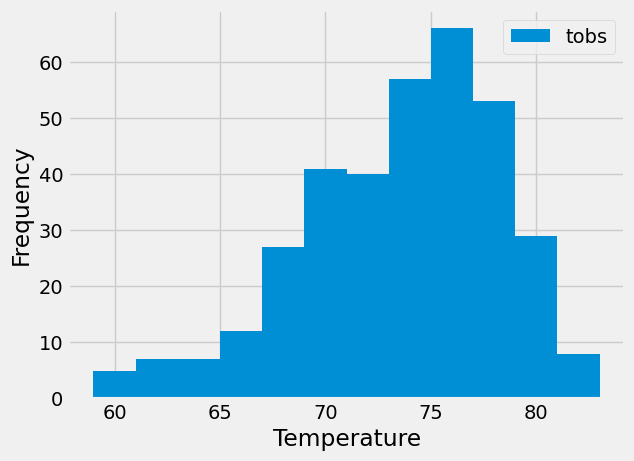

In [221]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_range = dt.date(2017,8,23) - dt.timedelta(days = 365)
active_station_plot = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281',Measurement.date >= date_range).all()
counts, bins = np.histogram(active_station_plot, bins = 12)
plt.stairs(counts,bins, fill = 'b')
plt.legend(['tobs'], loc = 'upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [222]:
# Close Session
session.close()